# Company Background 
Discount Motors is a used car dealership in the UK. They want to lead the way in used cars. Selling to customers who want the latest and greatest features, without the price tag of a brand new car. The UK Government has now announced that from 2030 all new cars will be required to be zero emissions. Although this won’t impact the used car market, it is expected that buyers will give more consideration to the future value of their cars. And petrol and diesel will likely have a much lower value after 2030.

## UK Used Car Sales
The details in the data reflect the information given to potential buyers in the website adverts.
Buyers typically want to know the road tax of a used car, which varies based on a
combination of year registered, emissions and fuel type, with Electric cars currently exempt
from road tax.

# Dataset
The marketing team has provided some data from the website listings from the last six
months. We know that all of the cars in this data sold. I think there is a lot of information
missing that could be useful to us.
| Column Name    | Details                                                                 |
|----------------|-------------------------------------------------------------------------|
| model          | Character, the model of the car, 18 possible values                     |
| year           | Numeric, year of registration from 1998 to 2020                         |
| price          | Numeric, listed value of the car in GBP. Assume the car also sold for this price. |
| transmission   | Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"        |
| mileage        | Numeric, listed mileage of the car at time of sale                      |
| fuelType       | Character, one of "Petrol", "Hybrid", "Diesel" or "Other"              |
| tax            | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car. |
| mpg            | Numeric, miles per gallon as reported by manufacturer                   |
| engineSize     | Numeric, listed engine size, one of 16 possible values                 |


# 1.Data Loading

In [191]:
-- Explore the data in the table
SELECT *
FROM 'toyota.csv'


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Validation

## 2.1 explore data size

In [193]:
print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

the dataset has 6738 rows and 9 columns


## 2.2 remove duplicates

In [194]:
duplicate_counts=df[df.duplicated()].shape[0]
duplicate_counts

39

In [195]:
df.drop_duplicates(inplace=True)

## 2.3 handle missing values

In [196]:
df.isnull().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
dtype: bool

no missing values are found

## 2.4 transfrom datatype

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 523.4+ KB


the datatype in each column is aligned with the description

## 2.4 check data consistency

In [198]:
df['model'].value_counts()

model
Yaris            2117
Aygo             1940
Auris             709
C-HR              479
RAV4              467
Corolla           265
Prius             232
Verso             114
Avensis           114
Hilux              85
GT86               73
Land Cruiser       51
PROACE VERSO       15
Supra              12
Camry              11
IQ                  8
Urban Cruiser       4
Verso-S             3
Name: count, dtype: int64

In [199]:
df['year'].value_counts().sort_index()

year
1998       1
1999       1
2000       1
2001       1
2002       4
2003       6
2004       7
2005      12
2006      11
2007      20
2008      19
2009      29
2010      18
2011      40
2012      42
2013     203
2014     351
2015     522
2016     990
2017    2015
2018    1014
2019    1265
2020     127
Name: count, dtype: int64

In [200]:
df['transmission'].value_counts()

transmission
Manual       3793
Automatic    2651
Semi-Auto     254
Other           1
Name: count, dtype: int64

In [201]:
df['fuelType'].value_counts()

fuelType
Petrol    4058
Hybrid    2040
Diesel     496
Other      105
Name: count, dtype: int64

In [202]:
df['engineSize'].value_counts()

engineSize
1.0    2038
1.5    1419
1.8    1289
1.3     600
2.0     394
1.2     300
2.5     247
1.6     166
2.4      70
2.2      58
1.4      40
2.8      36
3.0      34
0.0       6
4.2       1
4.5       1
Name: count, dtype: int64

the data is consistent with the description

## 2.5 handle outliers

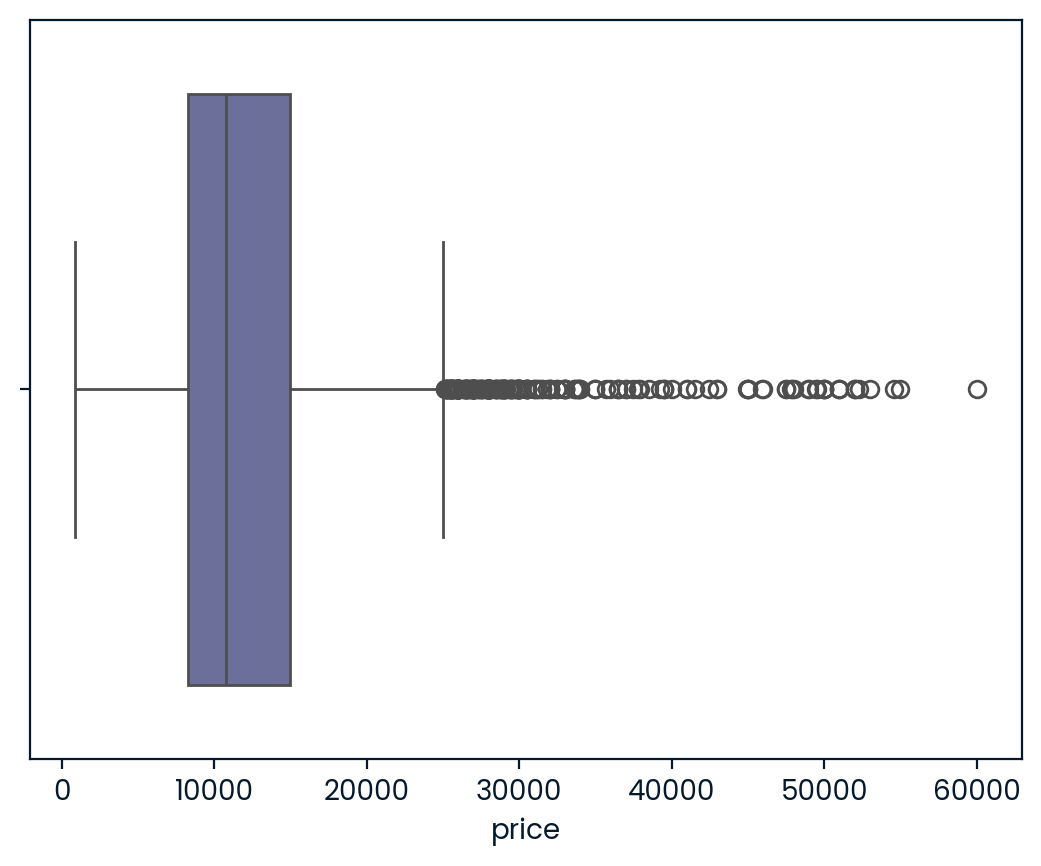

In [203]:
sns.boxplot(data=df,x='price')
plt.show()

The box is relatively narrow, indicating that the central part of the data is concentrated within a relatively small range (i.e., most of the data's price values are low).

A large number of outliers: The boxplot shows many outliers scattered between 20,000 and 60,000, meaning that there are some vehicles with prices significantly higher than the rest, possibly due to special cases (such as luxury cars or new cars) causing price anomalies.

Right-skewed distribution: The data shows a certain degree of right skew (a longer tail), meaning that there are some extreme values in the higher price range, but most of the data is concentrated in the lower price region.

Therefore, we need to further analyze the high price records to see whether they are normal records.

In [204]:
high_price=df[df['price']>25000]
high_price.groupby(['model','year']).size()


model         year
C-HR          2019    41
              2020     9
Camry         2019     9
              2020     1
Corolla       2019    11
              2020    20
GT86          2019     9
              2020     8
Hilux         2016     1
              2018     2
              2019     9
              2020     3
Land Cruiser  2013     1
              2014     3
              2015     6
              2016     2
              2017     7
              2018     1
              2019    15
              2020     8
PROACE VERSO  2019     9
              2020     2
Prius         2019     9
              2020     5
RAV4          2018     4
              2019    46
              2020     4
Supra         2019    12
Yaris         2018     1
dtype: int64

It is clear that the majority of high-priced cars are either new or high-end models.

<Axes: xlabel='mileage'>

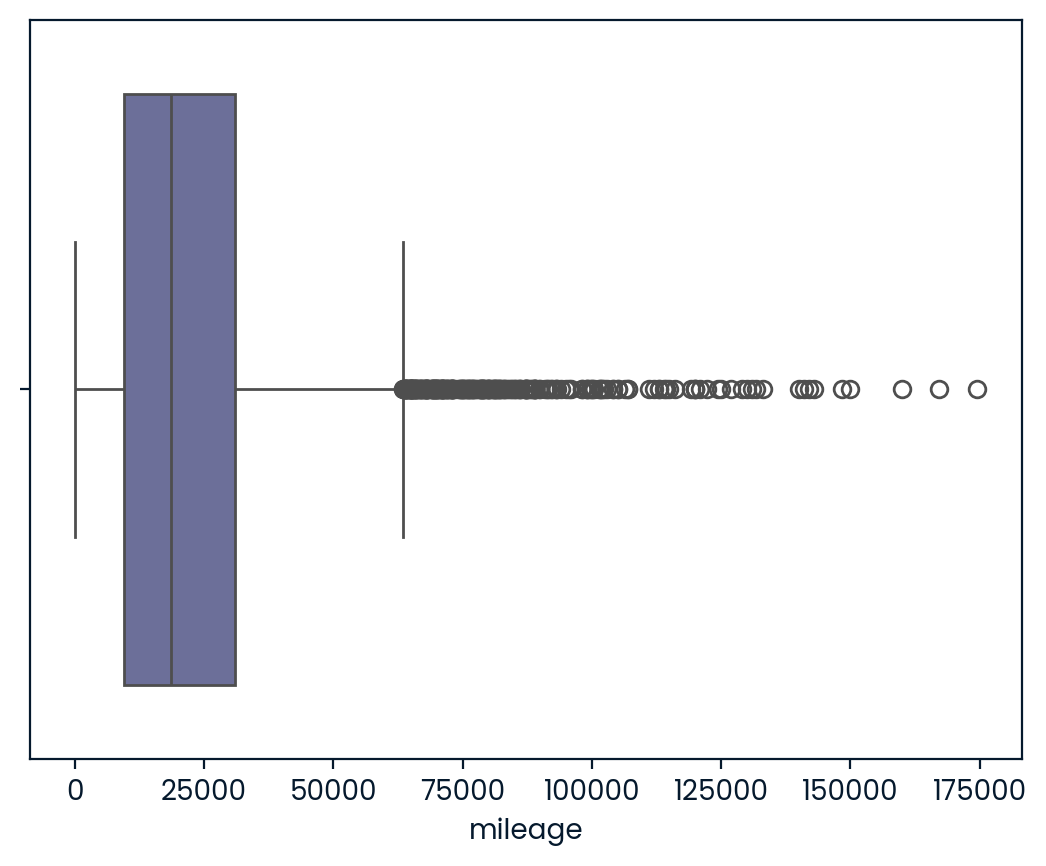

In [205]:
sns.boxplot(data=df,x='mileage')



The box is relatively narrow, indicating that the central part of the data is concentrated within a relatively small range (i.e., most of the data's mileage values are low).

A large number of outliers: The boxplot shows many outliers scattered between 60,000 and 175,000, meaning that there are some vehicles with mileage significantly higher than the rest, possibly due to special cases (such as old cars).

Therefore, we need further analysis.

In [206]:
high_mile=df[df['mileage']>60000]
high_mile_group=high_mile.groupby(['year','mileage']).size().reset_index(name='count')
high_mile_group.sort_values('mileage',ascending=False)

,year,mileage,count
67,2008,174419,1
11,2003,167054,1
16,2004,160000,1
116,2011,150000,1
84,2009,148371,1
...,...,...,...
218,2015,60148,1
117,2012,60069,1
171,2014,60067,1
134,2013,60020,1


<Axes: xlabel='tax'>

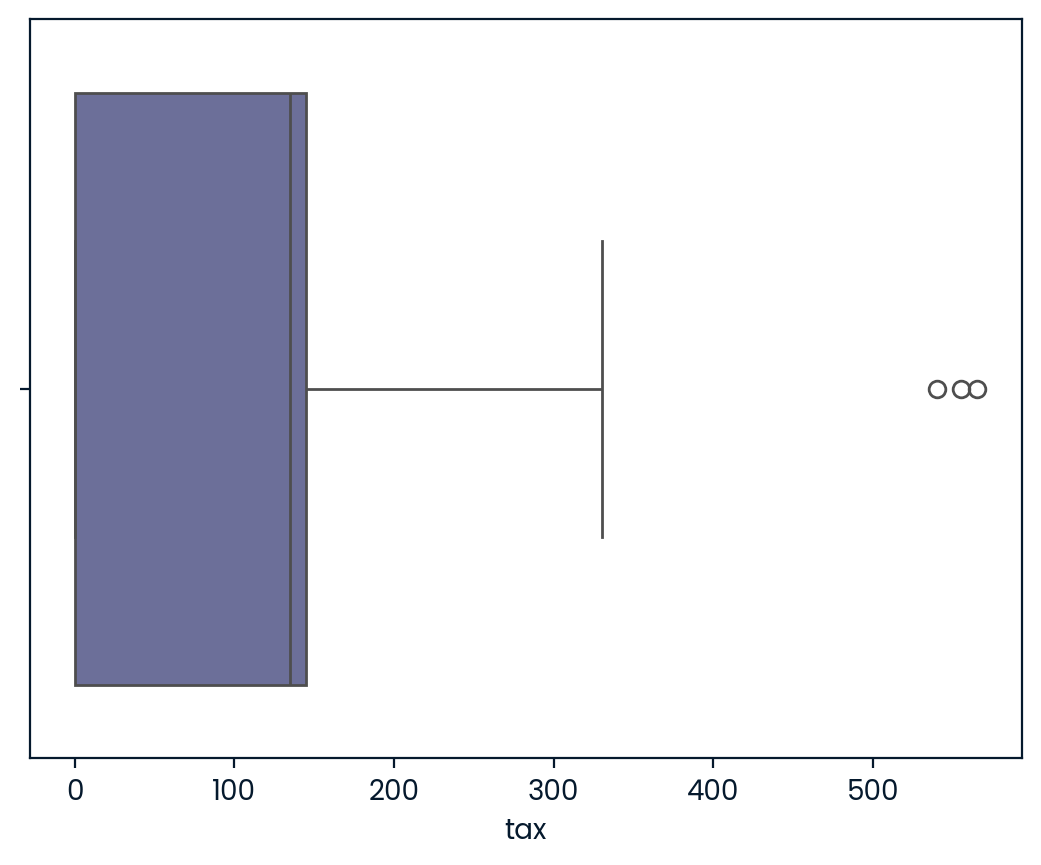

In [207]:
sns.boxplot(data=df,x='tax')


Most high mileage values are due to the cars being old.

<Axes: xlabel='mpg'>

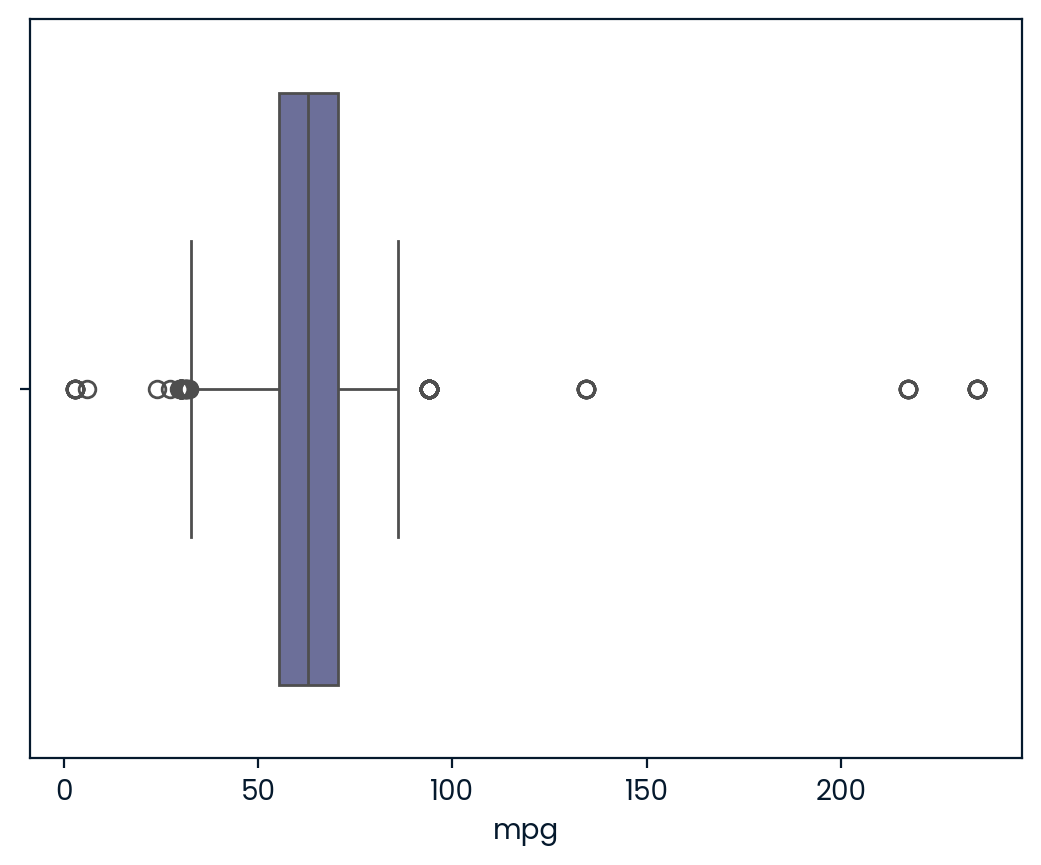

In [208]:
sns.boxplot(data=df,x='mpg')


there are few records with significantly low and high mpg values, which requires further analysis.

In [209]:
low_mpg=df[df['mpg']<25]
high_mpg=df[df['mpg']>100]

In [210]:
low_mpg[['year','model','fuelType']].value_counts()

year  model         fuelType
2019  Hilux         Diesel      5
2020  Hilux         Diesel      5
1998  Land Cruiser  Diesel      1
2018  C-HR          Petrol      1
Name: count, dtype: int64

he low MPG of the Hilux and Land Cruiser is mainly due to their vehicle types (pickup trucks, off-road SUVs), larger engine sizes, higher weight, and poor aerodynamic performance. The low MPG of the C-HR may be related to its larger size as an SUV and higher air resistance.

In [211]:
high_mpg[['year','model','fuelType']].value_counts()

year  model  fuelType
2019  Prius  Hybrid      7
2018  Prius  Hybrid      5
2017  Prius  Hybrid      3
2019  Prius  Other       3
2013  Prius  Hybrid      2
2014  Prius  Hybrid      2
2015  Prius  Hybrid      2
2020  Prius  Hybrid      2
2012  Prius  Hybrid      1
2014  Prius  Other       1
2016  Prius  Other       1
2018  Prius  Other       1
Name: count, dtype: int64

The high MPG of the Prius is due to the combination of its hybrid powertrain, regenerative braking, aerodynamic design, and efficient engine technology. These factors make it one of the most fuel-efficient vehicles on the market. 

# 3.Exploratory Analysis

## single-variable analysis

### used car sold by fuel type

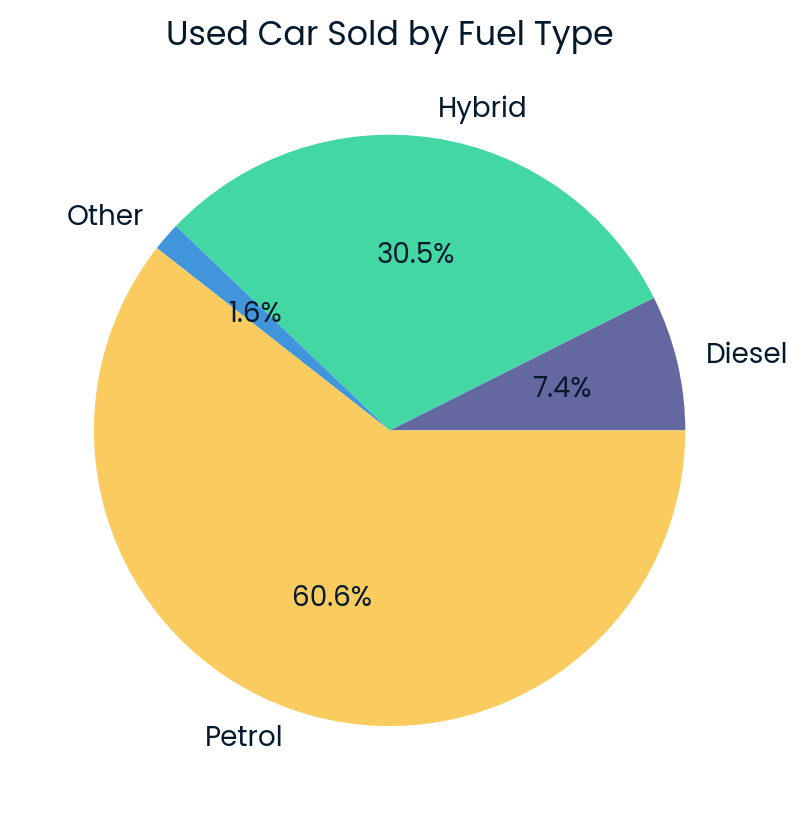

In [212]:
fuel_type_sales=df.groupby('fuelType').size().reset_index(name='count')
plt.pie(data=fuel_type_sales,x='count',autopct='%1.1f%%',labels='fuelType')
plt.title('Used Car Sold by Fuel Type')
plt.show()

The chart shows that in the dataset, petrol cars make up the majority, hybrid cars account for a certain proportion, while diesel cars and other types are less common.

### hybrid car sold by model

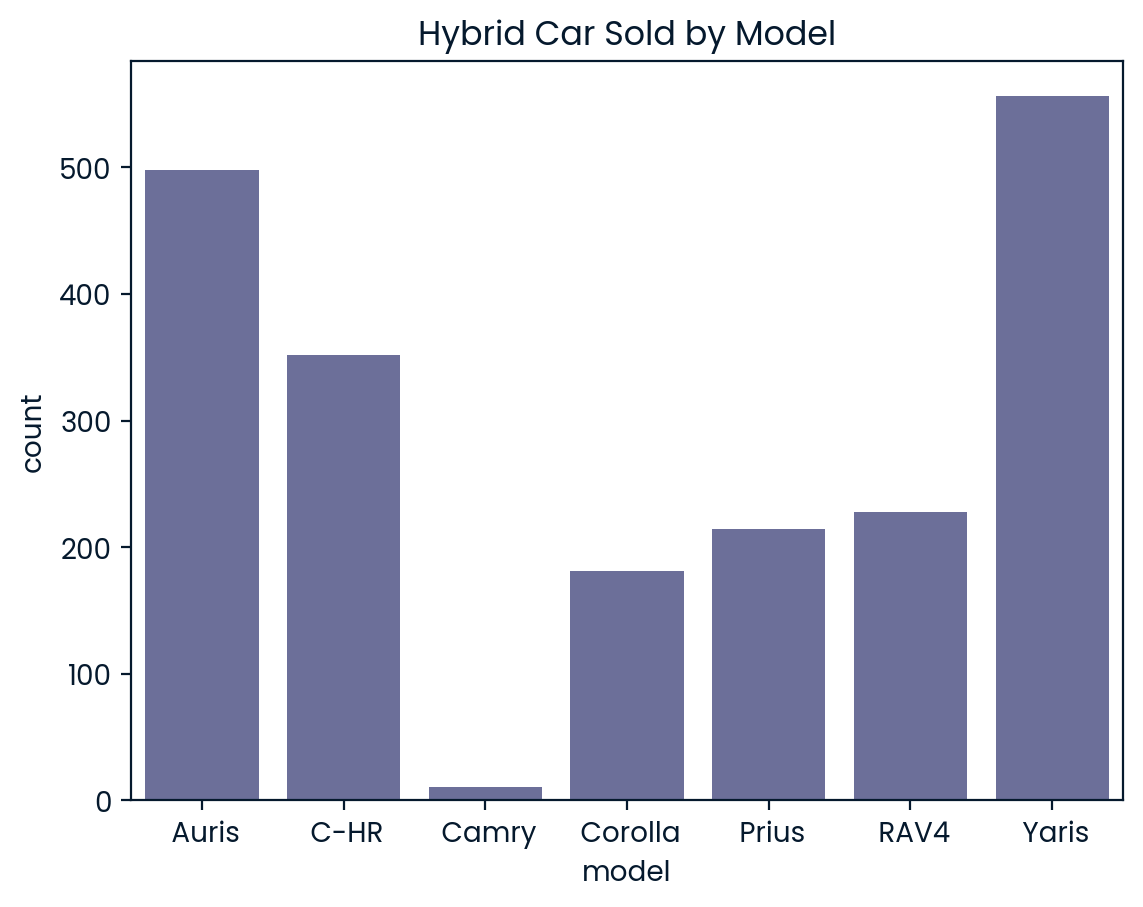

In [213]:
hybrid=df[df['fuelType']=='Hybrid'].groupby('model').size().reset_index(name='count')
sns.barplot(data=hybrid,x='model',y='count')
plt.title('Hybrid Car Sold by Model')
plt.show()

the best sellers of hybrid cars are Yaris,followed by Auris and C-HR.

### used car sold price distribution

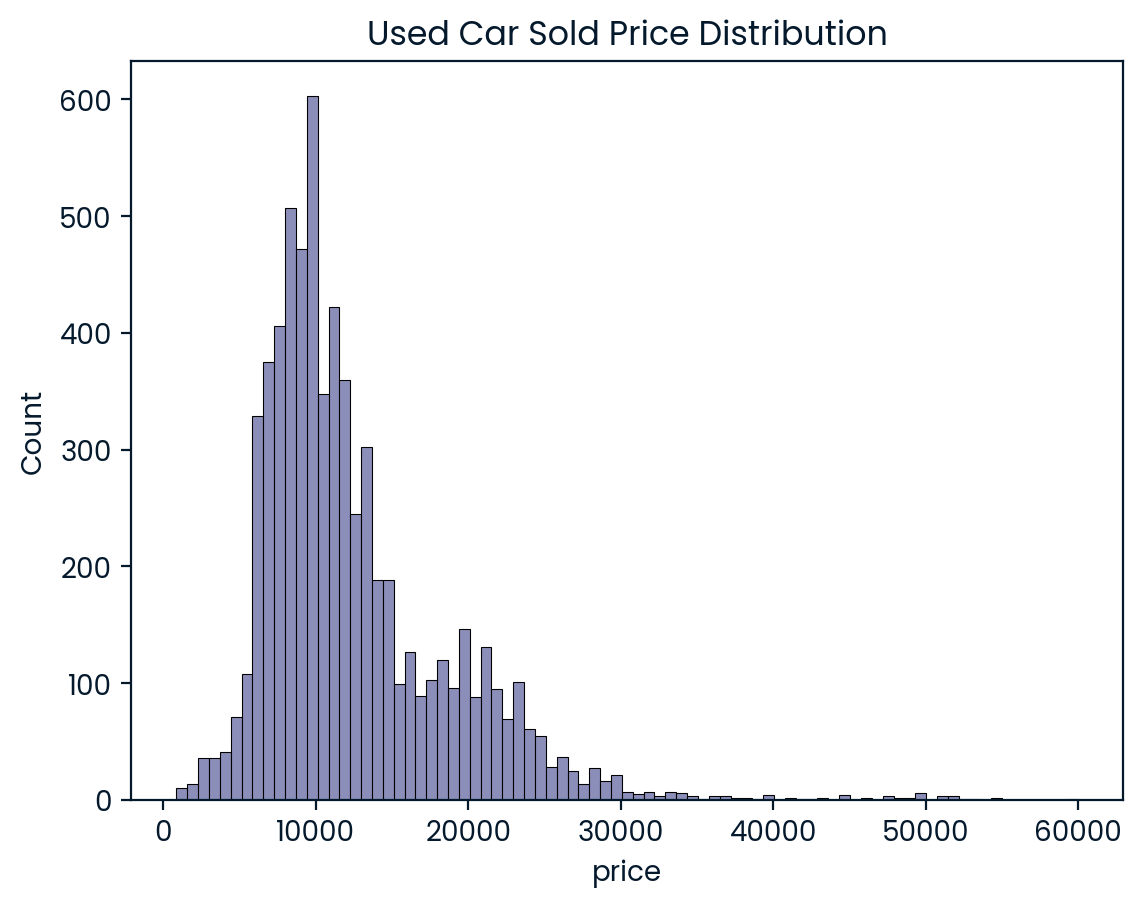

In [214]:
sns.histplot(data=df,x='price')
plt.title('Used Car Sold Price Distribution')
plt.show()

We also want to compare the price of all the cars we sold last 6 months. The majority of used cars sold last 6 months is less than 30000 GBP.

### price distribution by fuel type

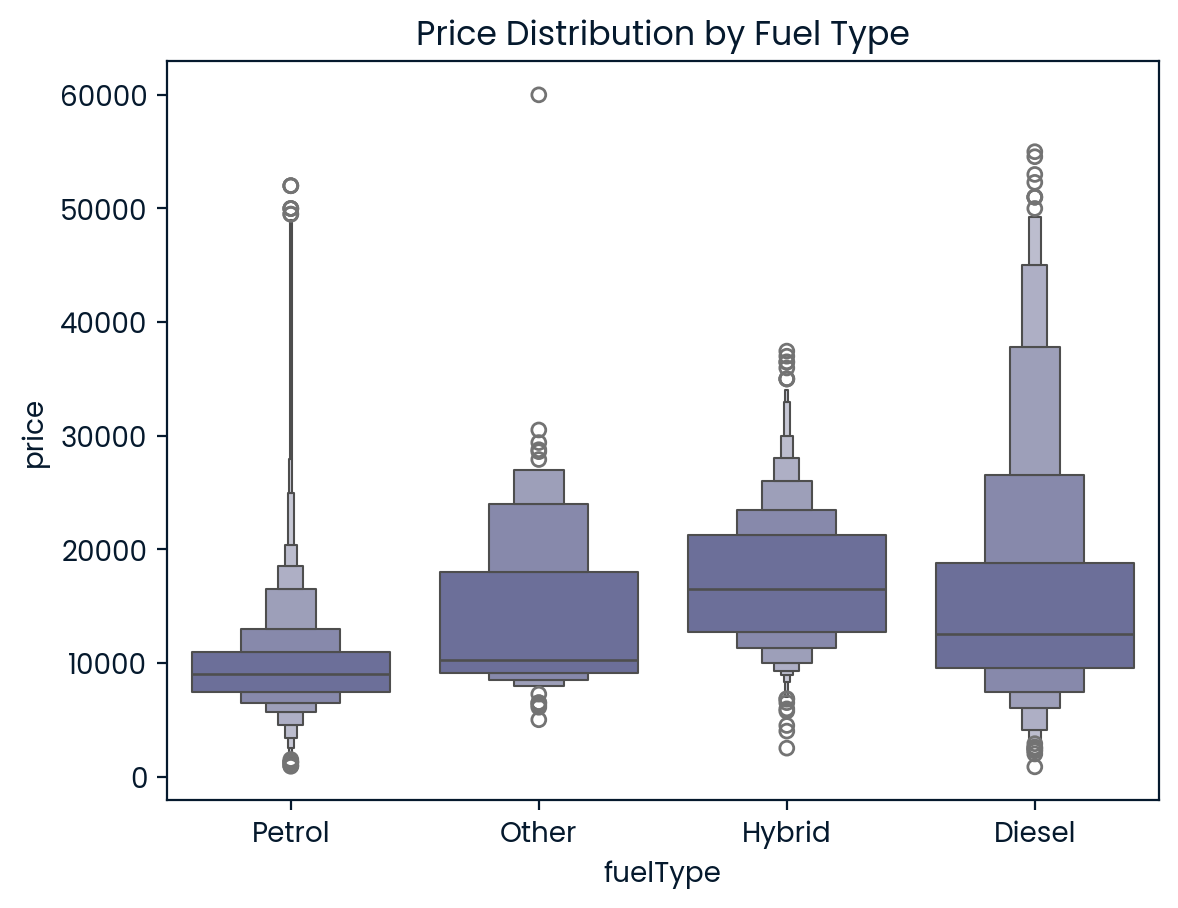

In [215]:
sns.boxenplot(data=df,x='fuelType',y='price')
plt.title('Price Distribution by Fuel Type')
plt.show()

The majority of the price of a hybrid car range from 11000 to 21000 GBP, which is higher than petrol and diesel. 

Petrol cars, the largest rival of the hybrid cars, majorly sold from 9000 to 12000 GBP. But as you can see from this graph, a few hybrid cars are also sold in this range.

### price distribution by model (hybrid cars only)

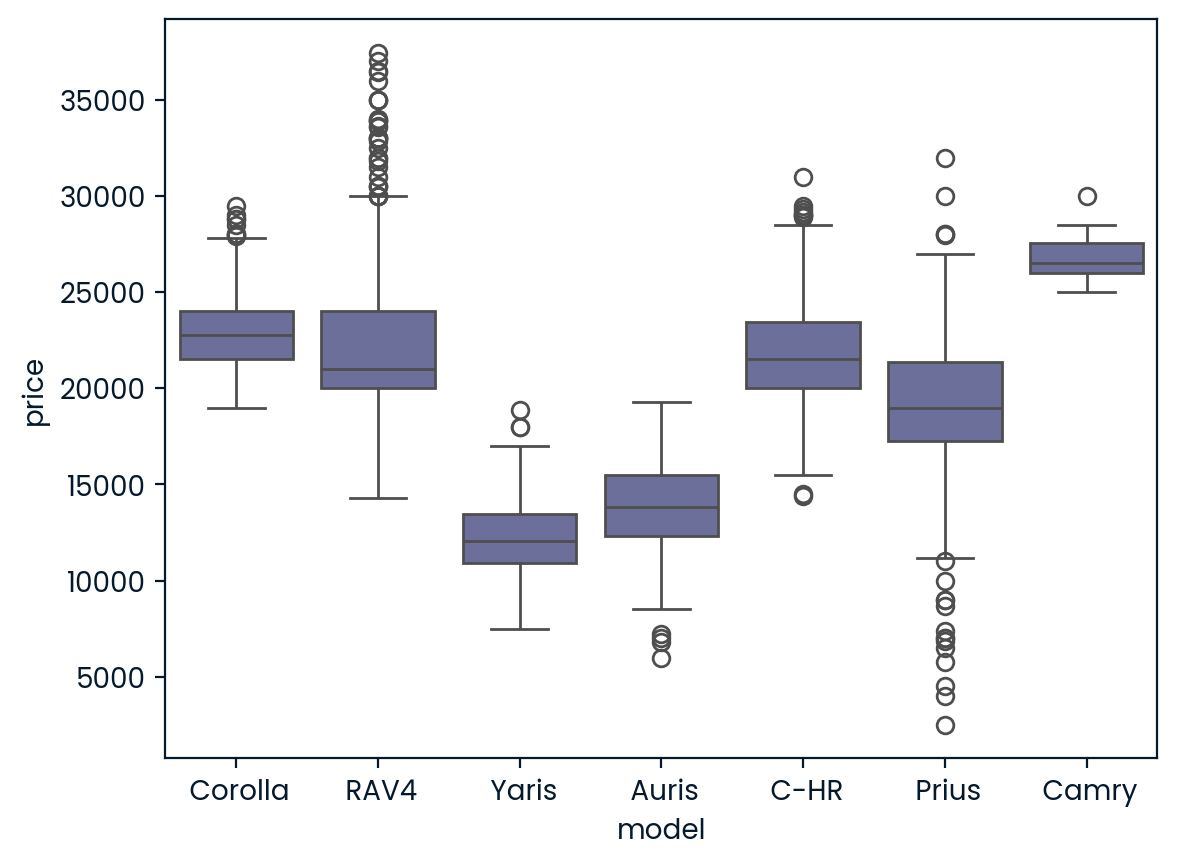

In [216]:
hybrid_price=df[df['fuelType']=='Hybrid']
sns.boxplot(data=hybrid_price,x='model',y='price')
plt.show()

# How to Make the Hybrid more Attractive?
Since the Hybrid models are more expensive than other types on average, we will find different ways to attract customers. From the multiple boxplots below, Prius, Yaris and Auris have records of selling lower than 10000 GBP in the last 6 months, which is competitive with the petrol cars. Therefore, for people concerned about price, we should make these three models our major campaign car models.


### tax distribution by fuel type

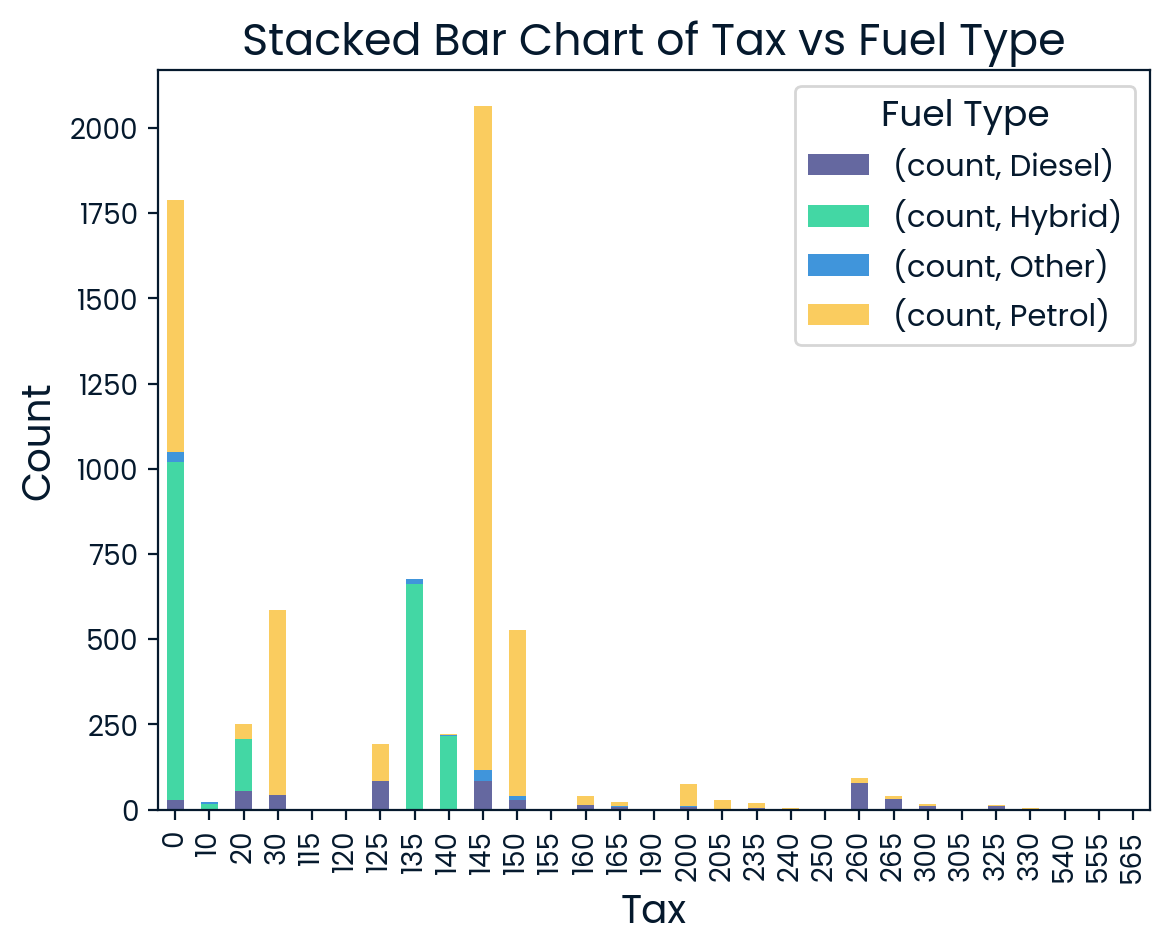

In [217]:
tax_fuel=df.groupby(['tax','fuelType']).size().reset_index(name='count')
tax_fuel_pivot=pd.pivot_table(data=tax_fuel,index='tax',columns='fuelType')
tax_fuel_pivot.plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Tax vs Fuel Type', fontsize=16)
plt.xlabel('Tax', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Fuel Type', title_fontsize='13', fontsize='11')
plt.show()

The other attractive information is the tax. From the bar chart above, we can see the most common road tax for the petrol model is 145 GBP, while the most common road tax for the hybrid model is 0 GBP. Therefore, for people buying traditional fuel-type car models, a Hybrid might be an excellent choice based on this information.

# Business Metrics
Since our goal is to increase the number of sales of hybrid and electric cars next year, I would recommend we use the percentage of hybrid and electric cars in total number of used cars sold last 6 months as our metric.

Based on our last 6 month data, 30% of the used cars sold are hybrid and electric cars. Therefore, if this number is increasing next 6 month, it indicates very good sign to achieve our goal.


# Recommendation
For the following weeks, I would recommend we can focus on the following steps:

- Using key metrics to monitor whether there is a strong sign to see the sales will increase.
- To implement the campaign as soon as possible, we should smartly promote the hybrid models in the market:
  - Promoting road tax reduction
  - Less expensive models -Prius, Yaris and Auris model
  - Stay on top of the current electric and hybrid car markets so that the newest information can be integrated in the campaign.
- Data Collection for in-depth analysis
  - Improve data quality - what the other fuel type means?
  - New related data - Using different fuel types in the same car model to compare eco-friendly cars and other fuel types